## Analysis

Dataset shape: (44, 18)


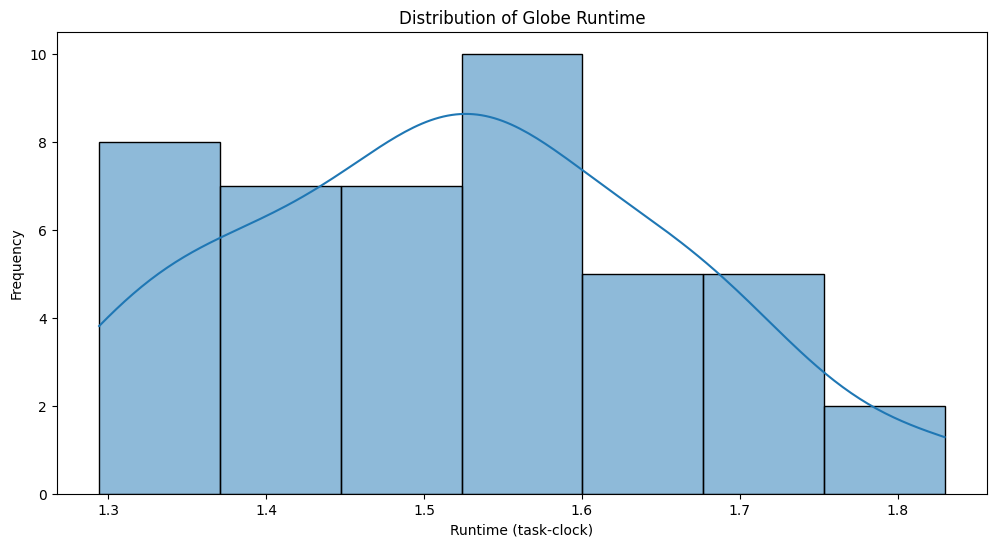

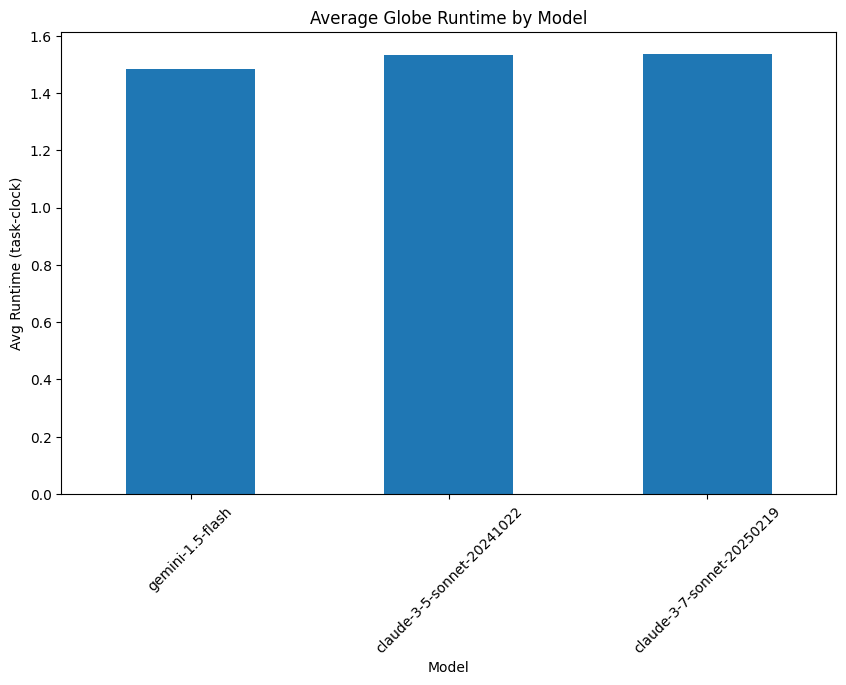

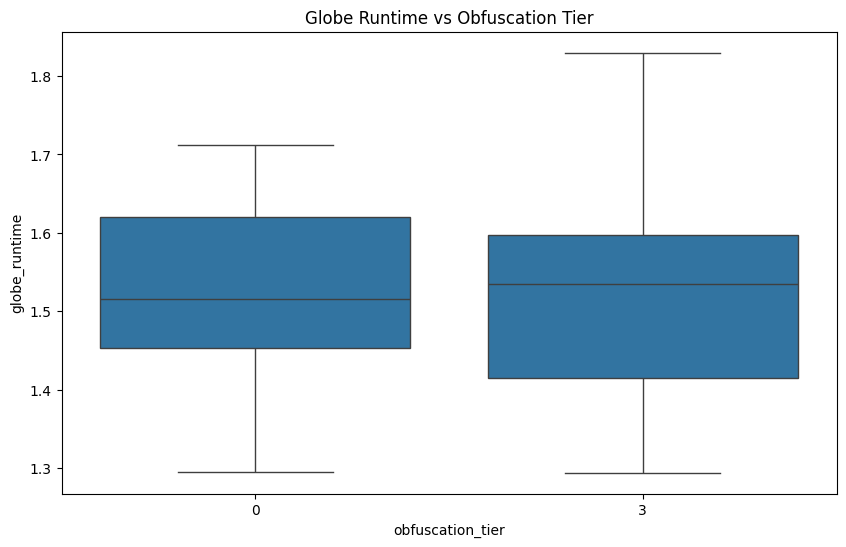

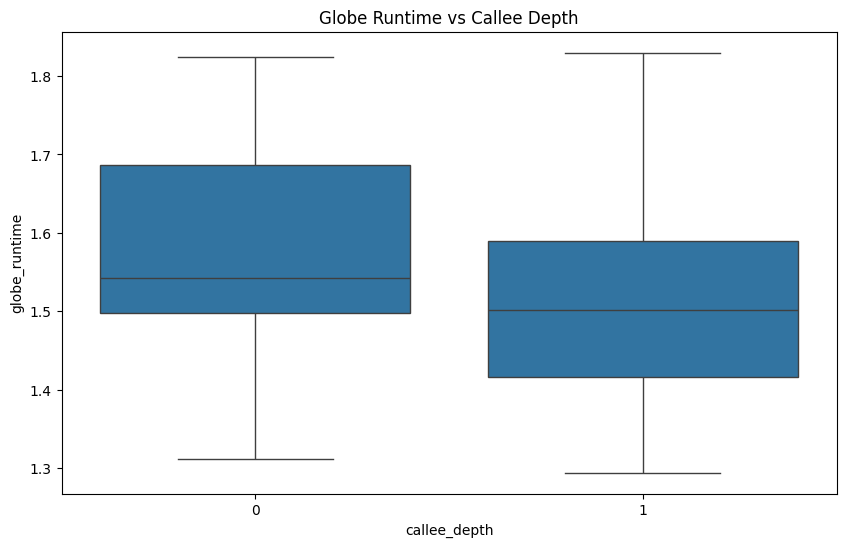

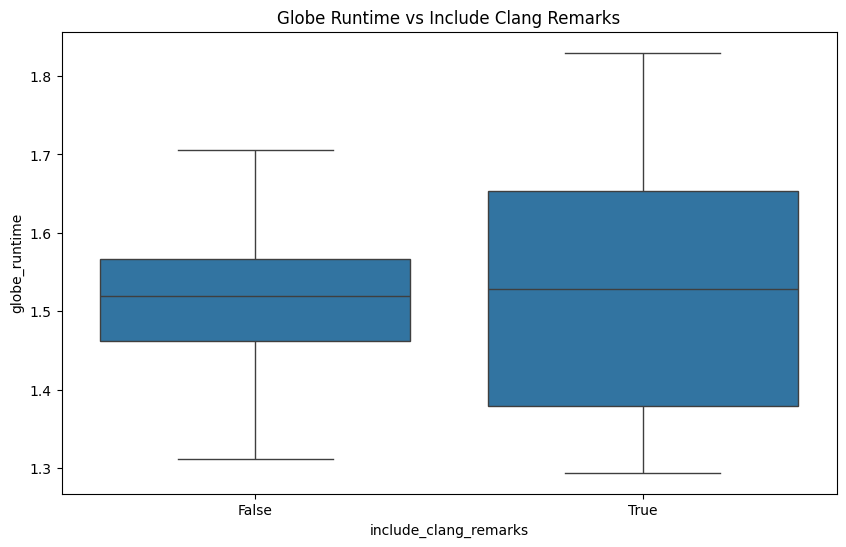


Test pass rate: 95.45%


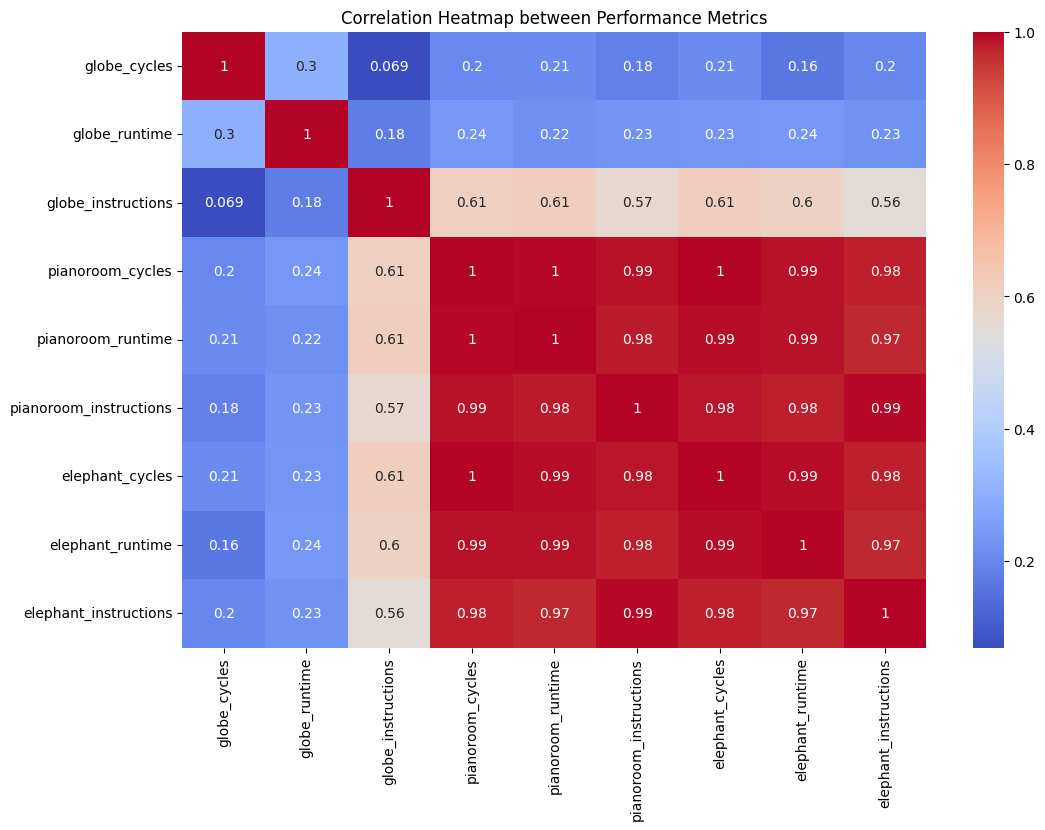

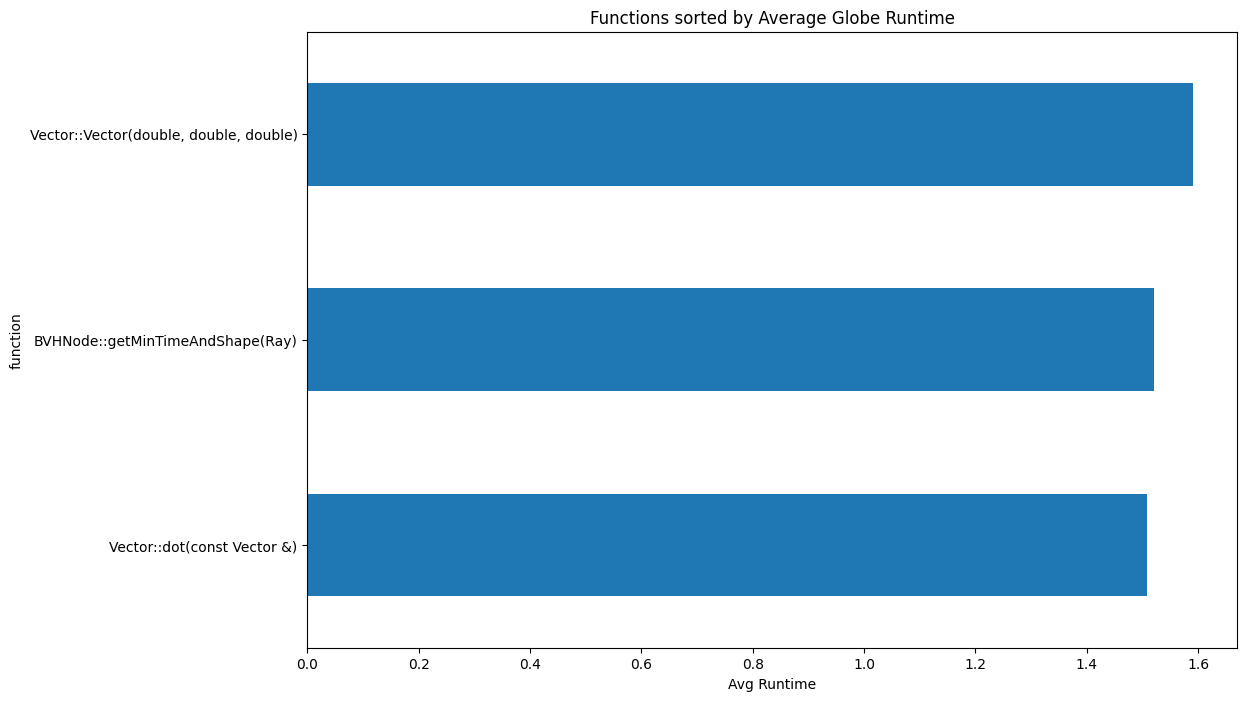

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

column_names = [
    'function', 'include_clang_remarks', 'obfuscation_tier', 'callee_depth',
    'model', 'provider',
    'globe_cycles', 'globe_runtime', 'globe_instructions',
    'pianoroom_cycles', 'pianoroom_runtime', 'pianoroom_instructions',
    'elephant_cycles', 'elephant_runtime', 'elephant_instructions',
    'tests_pass', 'branch_name', 'insights'
]

df = pd.read_csv('optimization_results.csv', header=None, names=column_names)

# Show basic info
print("Dataset shape:", df.shape)
df.head()

# Basic statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Function performance overview
performance_cols = ['globe_cycles', 'globe_runtime', 'globe_instructions',
                    'pianoroom_cycles', 'pianoroom_runtime', 'pianoroom_instructions',
                    'elephant_cycles', 'elephant_runtime', 'elephant_instructions']

# Plot distributions of runtime improvements
plt.figure(figsize=(12, 6))
sns.histplot(df['globe_runtime'], kde=True)
plt.title('Distribution of Globe Runtime')
plt.xlabel('Runtime (task-clock)')
plt.ylabel('Frequency')
plt.show()

# Compare models on average globe runtime
model_runtime = df.groupby('model')['globe_runtime'].mean().sort_values()
plt.figure(figsize=(10,6))
model_runtime.plot(kind='bar')
plt.title('Average Globe Runtime by Model')
plt.ylabel('Avg Runtime (task-clock)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Analyze effect of obfuscation tier
plt.figure(figsize=(10,6))
sns.boxplot(x='obfuscation_tier', y='globe_runtime', data=df)
plt.title('Globe Runtime vs Obfuscation Tier')
plt.show()

# Analyze callee_depth impact
plt.figure(figsize=(10,6))
sns.boxplot(x='callee_depth', y='globe_runtime', data=df)
plt.title('Globe Runtime vs Callee Depth')
plt.show()

# Analyze if including clang remarks helped
plt.figure(figsize=(10,6))
sns.boxplot(x='include_clang_remarks', y='globe_runtime', data=df)
plt.title('Globe Runtime vs Include Clang Remarks')
plt.show()

# Compare test pass rates
pass_rate = df['tests_pass'].mean()
print(f"\nTest pass rate: {pass_rate:.2%}")

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[performance_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Performance Metrics')
plt.show()

# Best overall configurations
best_rows = df.sort_values(by='globe_runtime').head(10)
best_rows[['function', 'model', 'provider', 'obfuscation_tier', 'callee_depth', 'globe_runtime', 'tests_pass']]

# Extra: Function-level analysis
top_functions = df.groupby('function')['globe_runtime'].mean().sort_values()
top_functions.plot(kind='barh', figsize=(12,8))
plt.title('Functions sorted by Average Globe Runtime')
plt.xlabel('Avg Runtime')
plt.show()

In [2]:
print(df.columns.tolist())

['BVHNode::getMinTimeAndShape(Ray)', 'True', '0', '1', 'gemini-1.5-flash', 'google', '5735118.0', '1.294492', '5645011.0', '248435308.0', '53.194583', '624553939.0', '881376139.0', '197.100996', '1111291996.0', 'False', 'optimize_bvh_mintime', 'The original code has a good structure already.  The primary performance bottleneck is likely the recursive calls to `getMinTimeAndShape`. While we cannot change the function signature or inline the function, we can improve the way we handle the recursive calls by reducing the number of times we potentially access the `time` member of `TimeAndShape` objects. We can also reduce branching by using a ternary operator.']
